In [1]:
pip install plotly==4.1.1 biokit

     |████████████████████████████████| 7.1 MB 23.5 MB/s 
     |████████████████████████████████| 162 kB 47.7 MB/s 
     |████████████████████████████████| 47 kB 5.6 MB/s 
     |████████████████████████████████| 1.0 MB 47.2 MB/s 
     |████████████████████████████████| 2.3 MB 47.6 MB/s 
     |████████████████████████████████| 51 kB 600 kB/s 
     |████████████████████████████████| 47 kB 5.2 MB/s 
     |████████████████████████████████| 144 kB 55.8 MB/s 
     |████████████████████████████████| 5.8 MB 48.6 MB/s 
     |████████████████████████████████| 251 kB 51.4 MB/s 
     |████████████████████████████████| 3.1 MB 48.5 MB/s 
     |████████████████████████████████| 121 kB 16.3 MB/s 
     |████████████████████████████████| 90 kB 10.7 MB/s 
     |████████████████████████████████| 100 kB 11.0 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 127 kB 10.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447

In [50]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [51]:
path = 'Wine.txt'
df = pd.read_csv(path)
df_original = df.copy()

In [52]:
print("O dado possui", df.shape[0], "amostras e", df.shape[1], "atributos")
df.head()

O dado possui 178 amostras e 14 atributos


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [53]:
df = df.rename(columns = {
    'Alcohol': 'Alcool',
    'Ash': 'Po',
    'Ash_Alcanity': 'Alcalinidade_po',
    'Magnesium': 'Magnesio',
    'Color_Intensity': 'Intensidade de cor'
})
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [54]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [55]:
matriz_correlacao = df.corr()
matriz_correlacao

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade de cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [56]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

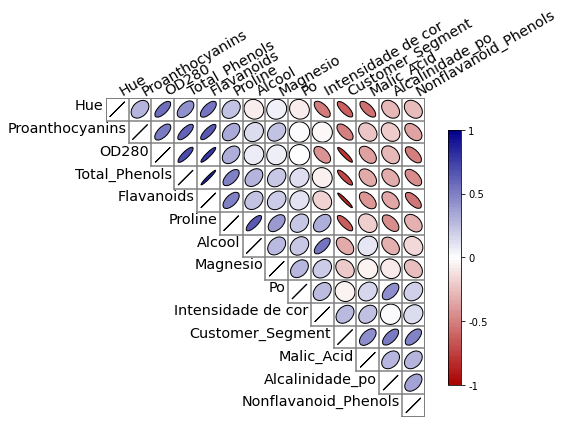

In [57]:
correlacao_graf = corrplot.Corrplot(matriz_correlacao)
correlacao_graf.plot(upper='ellipse', fontsize='x-large')
figure = plt.gcf()
figure.set_size_inches(13, 8)
figure.show()

In [58]:
atributos = df.columns
atributos

Index(['Alcool', 'Malic_Acid', 'Po', 'Alcalinidade_po', 'Magnesio',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Intensidade de cor', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [59]:
# min-max scaler
for atributo in atributos:
    df[atributo] = (df[atributo] - min(df[atributo])) / (max(df[atributo]) - min(df[atributo]))
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [61]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df_original.copy())

In [62]:
df_temp = pd.DataFrame(np_df, columns=atributos)
df_temp.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
np_df = min_max_scaler.inverse_transform(df_temp)
df_desnormalized = pd.DataFrame(np_df, columns=atributos)
df_desnormalized.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [64]:
from sklearn.cluster import KMeans

agrupador = KMeans(n_clusters=4)
agrupador.fit(df)

KMeans(n_clusters=4)

In [65]:
labels = agrupador.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 0, 3,
       3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [66]:
agrupador.fit(df)
labels = agrupador.labels_
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [67]:
figure = go.Figure()
figure.add_trace(go.Scatter(x = df['Intensidade de cor'],
                            y = df['Alcool'],
                            mode = 'markers',
                            marker = dict(color = agrupador.labels_.astype(np.float)),
                            text = labels))
figure.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [68]:
agrupador = KMeans(n_clusters=3)
agrupador.fit(df)
labels = agrupador.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [69]:
figure = go.Figure()
figure.add_trace(go.Scatter(x = df['Intensidade de cor'],
                            y = df['Alcool'],
                            mode = 'markers',
                            marker = dict(color = agrupador.labels_.astype(np.float)),
                            text = labels))
figure.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [70]:
figure = go.Figure()
figure.add_trace(go.Scatter3d(x = df['Intensidade de cor'],
                              y = df['Alcool'],
                              z = df['Proline'],
                              mode = 'markers',
                              marker = dict(color = labels.astype(np.float)),
                              text = labels))
figure.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [71]:
figure.update_layout(scene = dict(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = 'Álcool',
    zaxis_title = 'Proline'
))
figure.show()

In [72]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline,Customer_Segment
0,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000
1,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
2,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796


In [73]:
agrupador.cluster_centers_

array([[0.32295957, 0.23093888, 0.46981322, 0.4878231 , 0.26134216,
        0.43883058, 0.36629365, 0.43833744, 0.38348649, 0.15170401,
        0.46808059, 0.55539629, 0.16749364, 0.5       ],
       [0.71109649, 0.25      , 0.58716578, 0.34295533, 0.4009058 ,
        0.64408046, 0.55713783, 0.29937107, 0.4701367 , 0.35938567,
        0.47655827, 0.69358974, 0.59595816, 0.00833333],
       [0.55832438, 0.5147213 , 0.57470261, 0.55869977, 0.31543922,
        0.24074595, 0.09661586, 0.60531382, 0.23755875, 0.51734345,
        0.16741331, 0.15392091, 0.24932312, 0.98979592]])

In [74]:
figure.add_trace(go.Scatter3d(x = centros['Intensidade de cor'],
                              y = centros['Alcool'],
                              z = centros['Proline'],
                              mode = 'markers',
                              marker = dict(color = 'red'),
                              text = [0, 1, 2]))
figure.show()

In [75]:
from sklearn.cluster import DBSCAN

agrupador = DBSCAN(eps=1.31, min_samples=15, metric='manhattan')
agrupador.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [76]:
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [77]:
np.unique(agrupador.labels_)

array([-1,  0,  1,  2])

In [78]:
agrupador = DBSCAN(eps=0.01, min_samples=15, metric='manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [79]:
agrupador = DBSCAN(eps=10, min_samples=500, metric='manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [80]:
agrupador = DBSCAN(eps=0.01, min_samples=1, metric='manhattan')
agrupador.fit(df)
agrupador.labels_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177])

In [81]:
agrupador = DBSCAN(eps=10, min_samples=15, metric='manhattan')
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [82]:
agrupador = DBSCAN(eps=100, min_samples=1, metric='manhattan')
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [83]:
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'l2')
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [84]:
agrupador = DBSCAN(eps = 0.5, min_samples = 15, metric = 'l2')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  2,  2, -1, -1, -1,
       -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

In [85]:
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)
print(agrupador.labels_)

[ 0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  2 -1  2 -1  2 -1 -1  2 -1 -1  2 -1 -1
  2  2 -1  2  2  2 -1 -1 -1  2 -1  2  2 -1 -1 -1  2  2  2  2  2 -1  2  2
  2 -1  2  2  2  2  2  2  2  2]


In [86]:
labels = agrupador.labels_+1
print(labels)

[1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 2 2 0 2 2 2 0 0
 0 0 0 0 0 2 2 0 2 0 0 0 0 0 2 0 0 0 0 0 3 0 3 0 3 0 0 3 0 0 3 0 0 3 3 0 3
 3 3 0 0 0 3 0 3 3 0 0 0 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3]


In [87]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade de cor'],
                           y=df['Alcool'], 
                           z=df['Proline'],
                           mode='markers',
                           marker=dict(color =labels.astype(np.float)),
                           text=labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [96]:
from sklearn.cluster import MeanShift

agrupador = MeanShift(bandwidth=0.8)
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [107]:
from sklearn.cluster import estimate_bandwidth

BW = estimate_bandwidth(df, quantile=0.2)
agrupador = MeanShift(bandwidth=BW)
agrupador.fit(df)
agrupador.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [109]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade de cor'],
                           y=df['Alcool'],
                           z=df['Proline'],
                           mode = 'markers',
                           marker = dict(color = agrupador.labels_.astype(np.float)),
                           text = [0, 1, 2]))
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [114]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos
np.unique(agrupador.cluster_centers_)

array([0.        , 0.09080903, 0.09749671, 0.13338088, 0.13947368,
       0.14249147, 0.1509434 , 0.15424431, 0.17020148, 0.17027517,
       0.17662116, 0.18379447, 0.2131917 , 0.22082019, 0.22366485,
       0.22668666, 0.24048913, 0.24889909, 0.25098814, 0.25889328,
       0.26415094, 0.29603123, 0.30801688, 0.31261815, 0.32302405,
       0.32442068, 0.32474227, 0.34385965, 0.36534954, 0.36585366,
       0.37351403, 0.37613368, 0.37985197, 0.38045977, 0.39003538,
       0.39167916, 0.39421809, 0.3984375 , 0.40273038, 0.46056782,
       0.46212284, 0.46963595, 0.46970521, 0.47224558, 0.47746443,
       0.48796791, 0.48895899, 0.5       , 0.5042796 , 0.50469283,
       0.51282051, 0.51578947, 0.5326087 , 0.53763533, 0.53797468,
       0.55131579, 0.55737338, 0.55826558, 0.55856249, 0.57056498,
       0.57883091, 0.59701236, 0.60102563, 0.60910582, 0.64150943,
       0.64268728, 0.6631016 , 0.67479675, 0.69123405, 0.71755898,
       0.75      , 0.75862069, 0.76866456, 0.8       , 0.81684

In [113]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade de cor'],
                           y=centros['Alcool'], 
                           z=centros['Proline'],
                           mode = 'markers',
                           marker = dict(color = 'red'),
                           text = [0, 1, 2]))

In [117]:
from sklearn.cluster import KMeans

agrupador = KMeans(n_clusters=5)
agrupador.fit(df_original)
agrupador.labels_

array([3, 3, 3, 1, 4, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 4, 4, 4,
       3, 3, 4, 4, 3, 1, 4, 3, 1, 1, 3, 1, 3, 4, 4, 3, 3, 4, 4, 3, 3, 0,
       4, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 4, 0, 4, 2, 2, 3, 4, 2, 2, 2, 4, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 4, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 2, 0, 4, 4, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 4, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 2, 0, 4, 4, 4,
       4, 0], dtype=int32)

In [118]:
figure = go.Figure()
figure.add_trace(go.Scatter3d(x=df['Intensidade de cor'],
                              y=df['Alcool'],
                              z=df['Proline'],
                              mode='markers',
                              marker=dict(color=labels.astype(np.float)),
                              text=[0, 1, 2]))
figure.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [124]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

valores_silhueta = []
faixa_n_cluster = [i for i in range(2, 10)]

for k in faixa_n_cluster:
  agrupador = KMeans(n_clusters=k)
  labels = agrupador.fit_predict(df)
  media_silhueta = silhouette_score(df, labels)
  valores_silhueta.append(media_silhueta)

In [125]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=faixa_n_cluster, y=valores_silhueta))
figure.update_layout(title="Valores de silhueta médios",
                     xaxis_title="Número de clústeres",
                     yaxis_title="Valores médio de silhueta")
figure.show()

In [136]:
faixa_quantil = np.linspace(0.02, 0.5, 30)
valores_silhueta = []
quantil_plot = []

for quantil in faixa_quantil:
  bandwidth = estimate_bandwidth(df, quantile=quantil)
  agrupador = MeanShift(bandwidth=bandwidth)
  labels = agrupador.fit_predict(df)
  distinct_labels = np.unique(labels)
  if  len(distinct_labels) < len(df) and len(distinct_labels) > 1:
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)
    quantil_plot.append(quantil)

In [137]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=quantil_plot,
                            y=valores_silhueta))
figure.update_layout(xaxis_title="Quantil",
                     yaxis_title="Média silhueta")
figure.show()

In [142]:
from collections import Counter

faixa_min_samples = [i for i in range(1,100,5)]
faixa_eps = [i/10 for i in range(1,100,1)]

valores_silhueta = []
eps_plot = []
min_samples_plot = []
for min_samples in faixa_min_samples:
  for eps in faixa_eps:
    labels = 0
    agrupador = DBSCAN(eps = eps, min_samples = min_samples, metric = 'manhattan')
    agrupador.fit_predict(df)
    labels = agrupador.labels_
    counter_labels = Counter(labels)
    """
    porque não é possível calcular
    silhueta para apenas um cluster ou para número de clústeres igual
    ao número de dados 
    """
    if(counter_labels[0] < len(df) and counter_labels[0] > 1): 
      media_silhueta = silhouette_score(df, labels)
      valores_silhueta.append(media_silhueta)
      eps_plot.append(eps)
      min_samples_plot.append(min_samples)

In [143]:
idx = valores_silhueta.index(max(valores_silhueta))
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=[min_samples_plot[idx]],
                           y=[eps_plot[idx]], 
                           z=[max(valores_silhueta)],
                           mode='markers',
                           marker_line_color="midnightblue", 
                           marker_symbol=['x']))
fig.add_trace(go.Scatter3d(x=min_samples_plot,
                           y=eps_plot, 
                           z=valores_silhueta,
                           mode='markers',
                           text=labels))
fig.update_layout(scene = dict(
                    xaxis_title='eps',
                    yaxis_title='min_samples',
                    zaxis_title='silhueta'))
fig.show()

In [144]:
idx = valores_silhueta.index(max(valores_silhueta))
print(eps_plot[idx])
print(min_samples_plot[idx])

2.7
81


In [145]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

agrupador_kmeans = KMeans(n_clusters=3)
agrupador_dbscan = DBSCAN(eps=2.7, min_samples=81, metric='manhattan')
BW = estimate_bandwidth(df, quantile=0.2)
agrupador_meanshift = MeanShift(bandwidth=BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_dbscan.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print("Labels K-Means:", labels_kmeans)
print("Labels DBSCAN:", labels_dbscan)
print("Labels MeanShift:", labels_meanshift)

Labels K-Means: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Labels DBSCAN: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [146]:
print("O coeficiente de silhueta do K-Means é:", silhouette_score(df, labels_kmeans))
print("O coeficiente de silhueta do DBSCAN é:", silhouette_score(df, labels_dbscan))
print("O coeficiente de silhueta do MeanShift é:", silhouette_score(df, labels_meanshift))

O coeficiente de silhueta do K-Means é: 0.36950618492736303
O coeficiente de silhueta do DBSCAN é: 0.3584231880254969
O coeficiente de silhueta do MeanShift é: 0.3435317354353202
